# Visualisasi data

## Diagram batang

In [1]:
library(dplyr)
df <- read.csv('../data/murders.csv')
head(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



state,abb,region,population,PopulationDensity,murders,gunmurders,gunownership
Alabama,AL,South,4779736,94.65,199,135,0.517
Arizona,AZ,West,6392017,57.05,352,232,0.311
California,CA,West,37253956,244.20,1811,1257,0.213
Colorado,CO,West,5029196,49.33,117,65,0.347
Connecticut,CT,Northeast,3574097,741.40,131,97,0.167
Florida,FL,South,19687653,360.20,987,669,0.245


In [2]:
subdf <- select(df, state, population, murders)
head(subdf)

state,population,murders
Alabama,4779736,199
Arizona,6392017,352
California,37253956,1811
Colorado,5029196,117
Connecticut,3574097,131
Florida,19687653,987


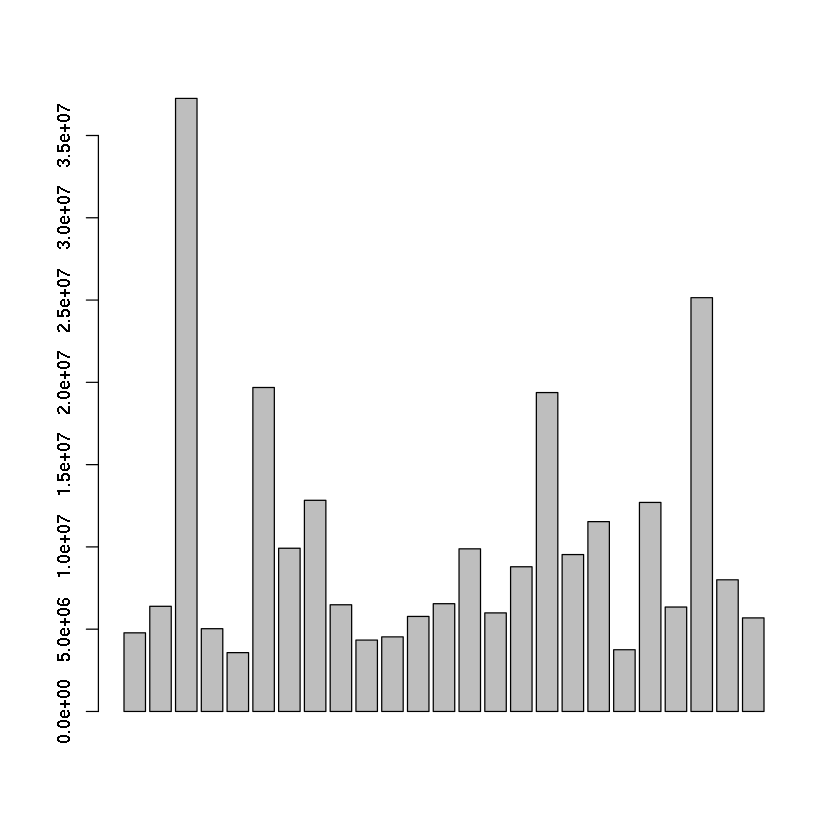

In [3]:
barplot(subdf$population)

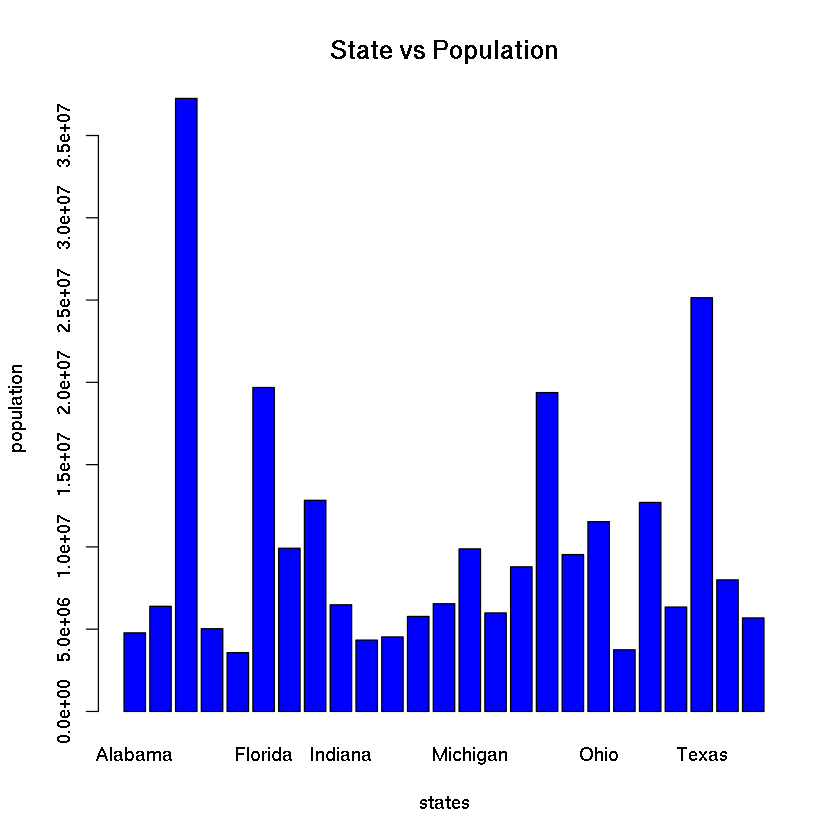

In [4]:
# kostumisasi grafik
barplot(subdf$population,
       xlab='states',
       ylab='population',
       main='State vs Population',
       names.arg = subdf$state,
       col='blue')

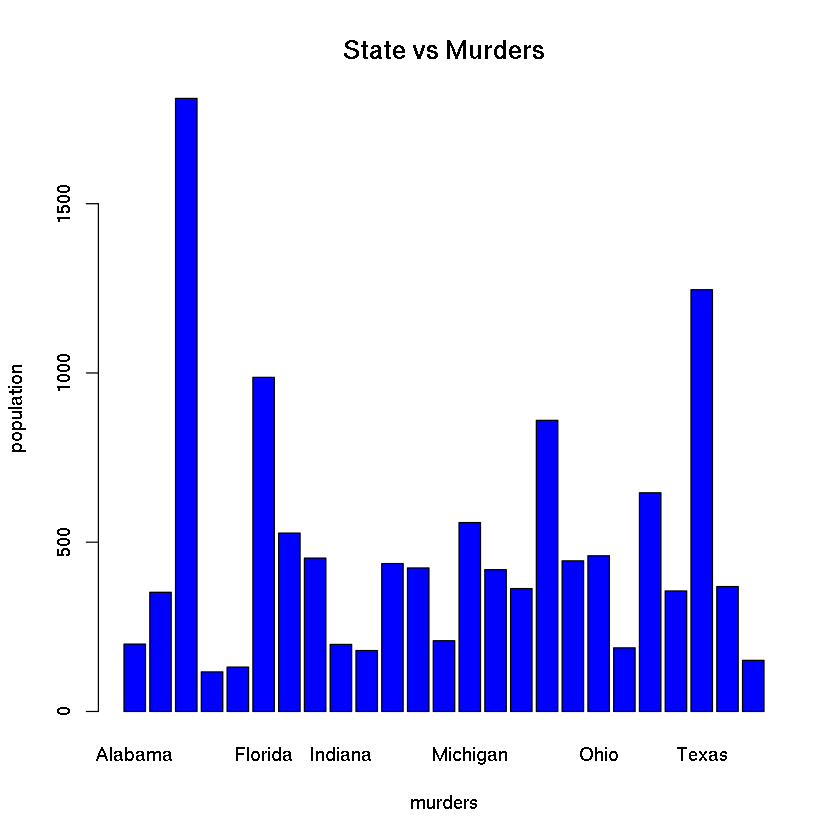

In [5]:
# kostumisasi grafik murders
barplot(subdf$murders,
       xlab='murders',
       ylab='population',
       main='State vs Murders',
       names.arg = subdf$state,
       col='blue')

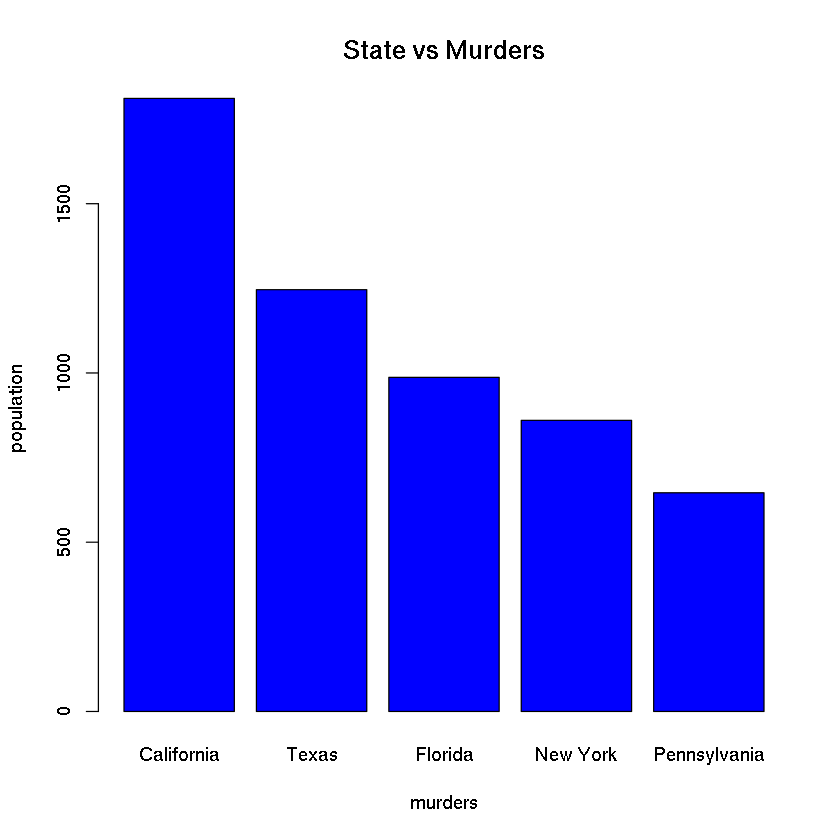

In [6]:
# mengurutkan df berdasarkan angka pembunuhan (secara terbalik)
dfsort <- arrange(df, desc(murders)) 

# menseleksi kolom - kolom tertentu
subdfsort <- select(dfsort, state, population, murders)

# Mengambil 5 data tertinggi untuk kasus pembunuhan
topsubdfsort <- head(subdfsort,5)

# PLOT!!!
barplot(topsubdfsort$murders,
       xlab='murders',
       ylab='population',
       main='State vs Murders',
       names.arg = topsubdfsort$state,
       col='blue')

## Diagram batang horizontal

In [9]:
df <- read.csv("../data/murdersmini.csv")
df

state,population,murders
Arizona,6392017,352
Colorado,5029196,117
Georgia,9920000,527
Iowa,3046355,38
Kansas,2853118,100
Maine,1328361,24
Michigan,9883640,558
New York,19378102,860
Texas,25145561,1246
Washington,6724540,151


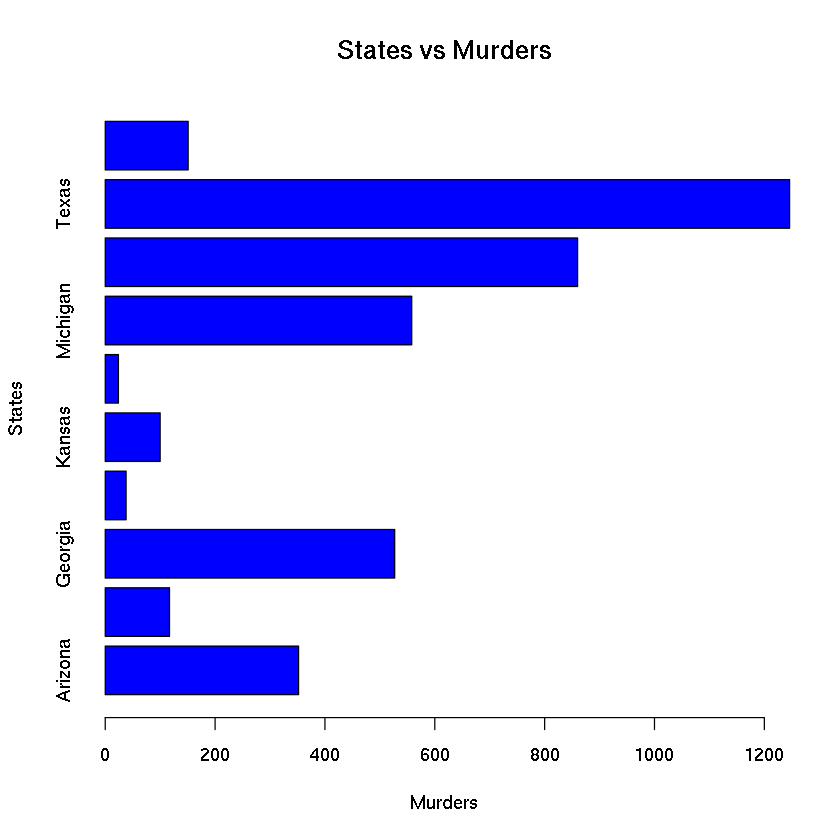

In [16]:
seldf <- select(df, state, murders)
barplot(seldf$murders, horiz=T,
       xlab='Murders', ylab='States',
       main = 'States vs Murders',
       col='blue',
       names.arg = seldf$state)

## Diagram batang bertumpuk

In [17]:
df

state,population,murders
Arizona,6392017,352
Colorado,5029196,117
Georgia,9920000,527
Iowa,3046355,38
Kansas,2853118,100
Maine,1328361,24
Michigan,9883640,558
New York,19378102,860
Texas,25145561,1246
Washington,6724540,151


In [18]:
dfs <- mutate(df,pop = population / 10000)

In [19]:
names(dfs)

[1] "state"      "population" "murders"    "pop"

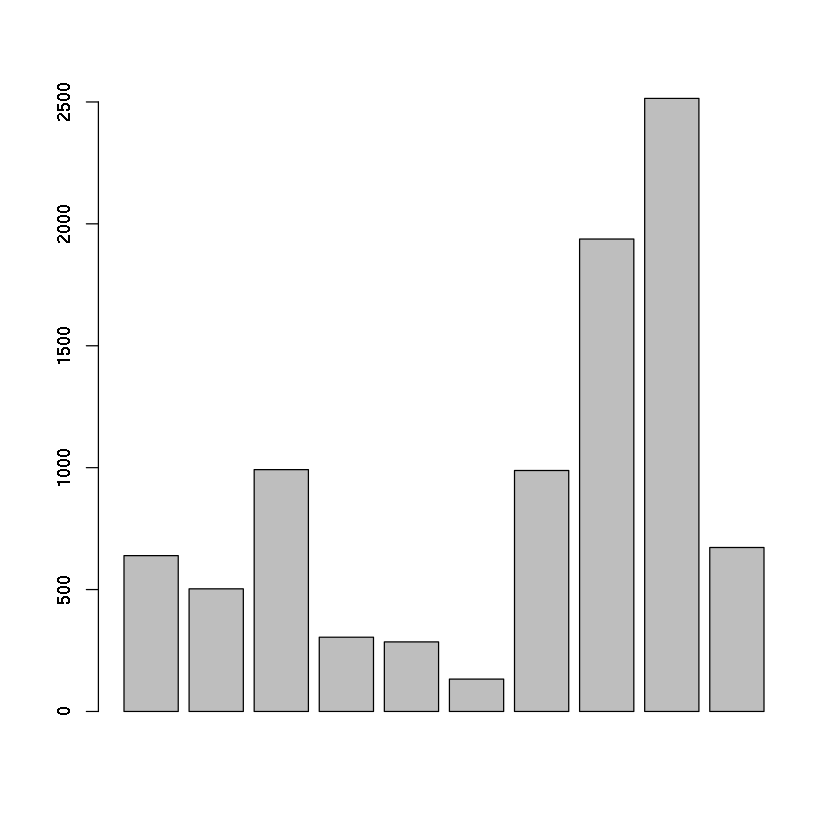

In [20]:
dfs <- dfs[c(1,3,4)]
barplot(dfs$pop)

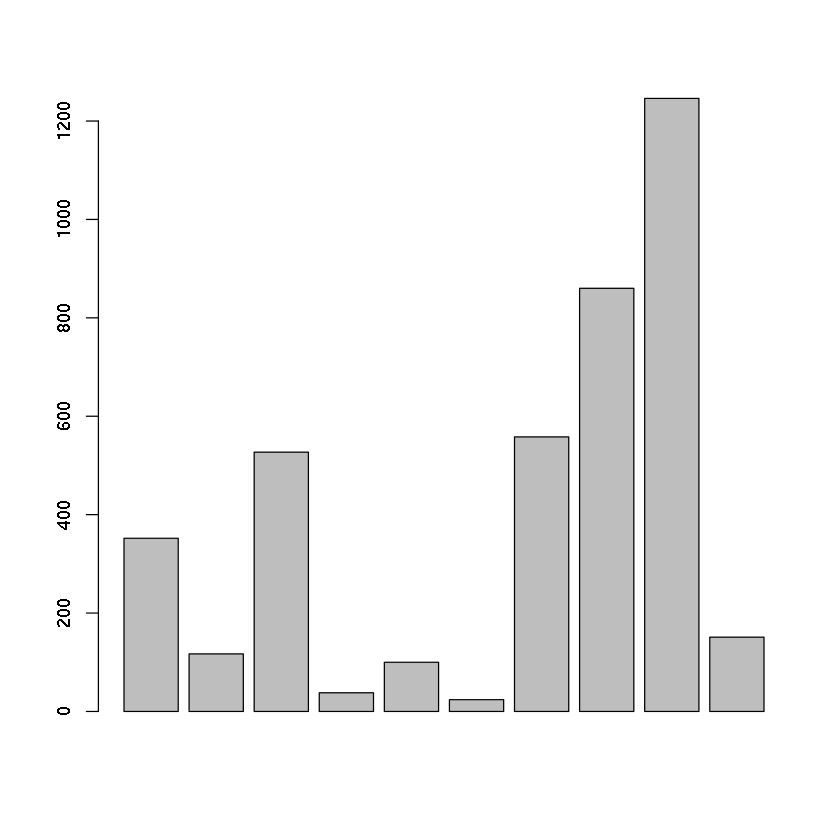

In [21]:
barplot(dfs$murders)

In [25]:
mat <- data.matrix(dfs)
mat <- t(mat) # transpos
mat

state,1.0000,2.0000,3,4.0000,5.0000,6.0000,7.000,8.00,9.000,10.000
murders,352.0000,117.0000,527,38.0000,100.0000,24.0000,558.000,860.00,1246.000,151.000
pop,639.2017,502.9196,992,304.6355,285.3118,132.8361,988.364,1937.81,2514.556,672.454


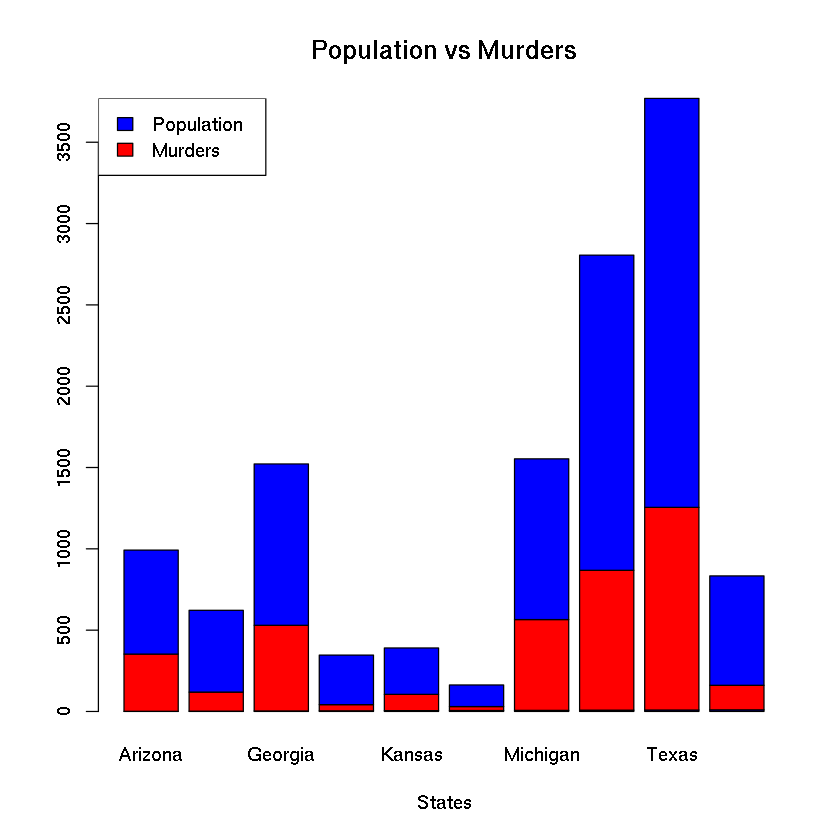

In [29]:
barplot(mat, 
       xlab='States',
       main='Population vs Murders',
       col=c('blue', 'red'),
       names.arg=dfs$state)
legend('topleft', c('Population', 'Murders'), fill=c('blue', 'red'))

## Histogram

In [32]:
df <- read.csv('../data/GEStock.csv')
head(df)

Date,Price
1/1/70,74.25333
2/1/70,69.97684
3/1/70,72.15857
4/1/70,74.25273
5/1/70,66.66524
6/1/70,67.59318


In [33]:
subdf <- select(df, Date, Price)

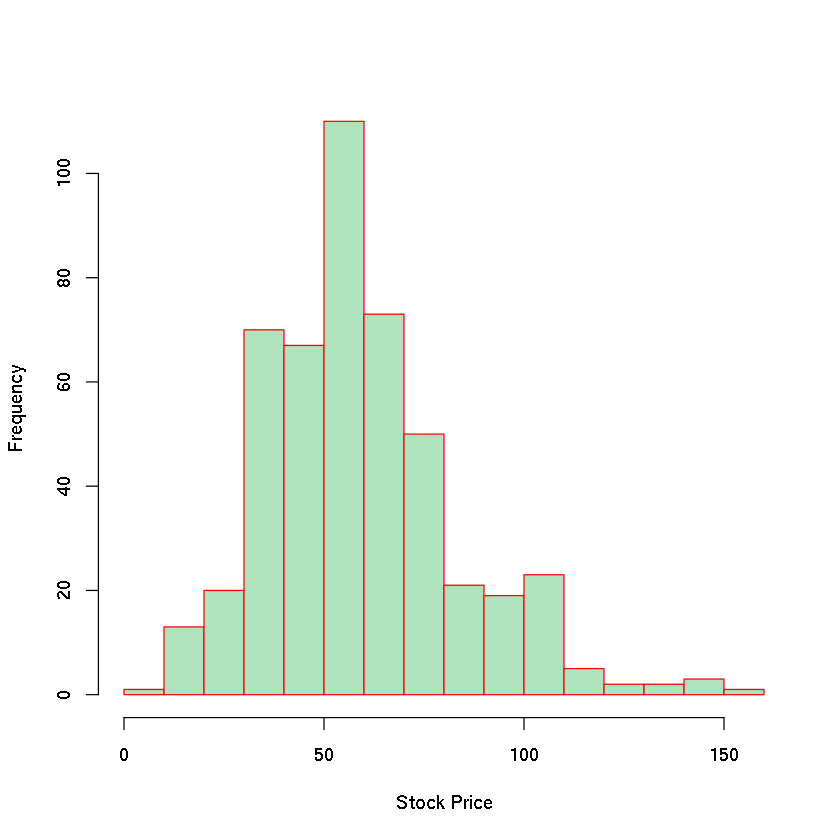

In [37]:
hist(subdf$Price,
    xlab='Stock Price',
    main='',
    col='#afe3be',
    border='red',
    breaks = 20) # secara default bins=10

## *Scatterplot*

In [39]:
df <- read.csv("../data/murders.csv")
df <- select(df,state,population,murders)

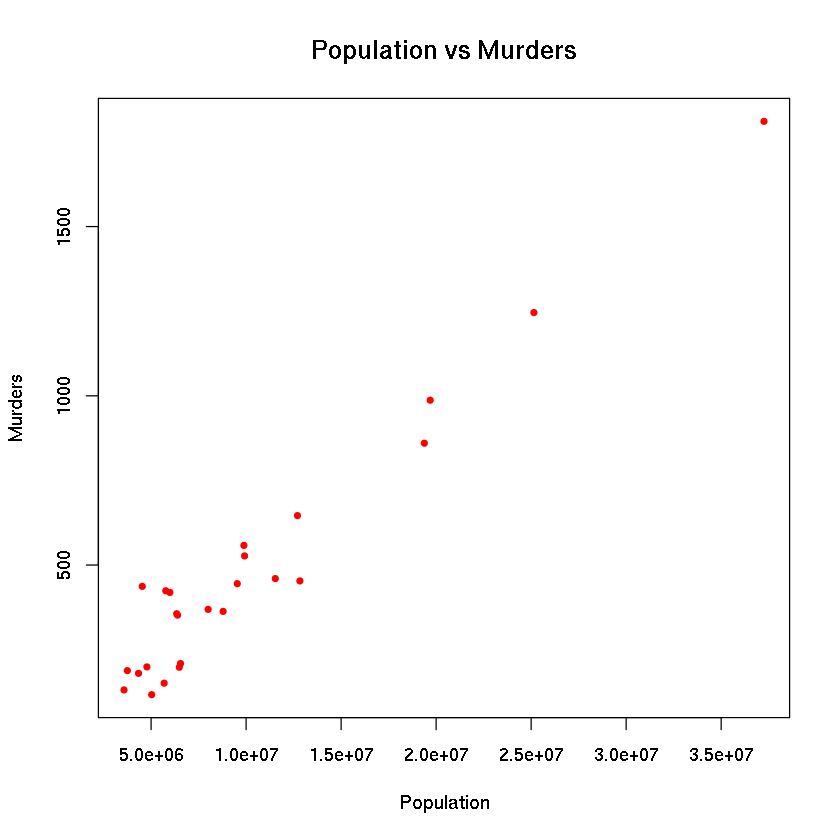

In [42]:
plot(df$population, df$murders,
    xlab='Population', ylab='Murders',
    main='Population vs Murders', col='red',
    pch = 20)

## Diagram garis

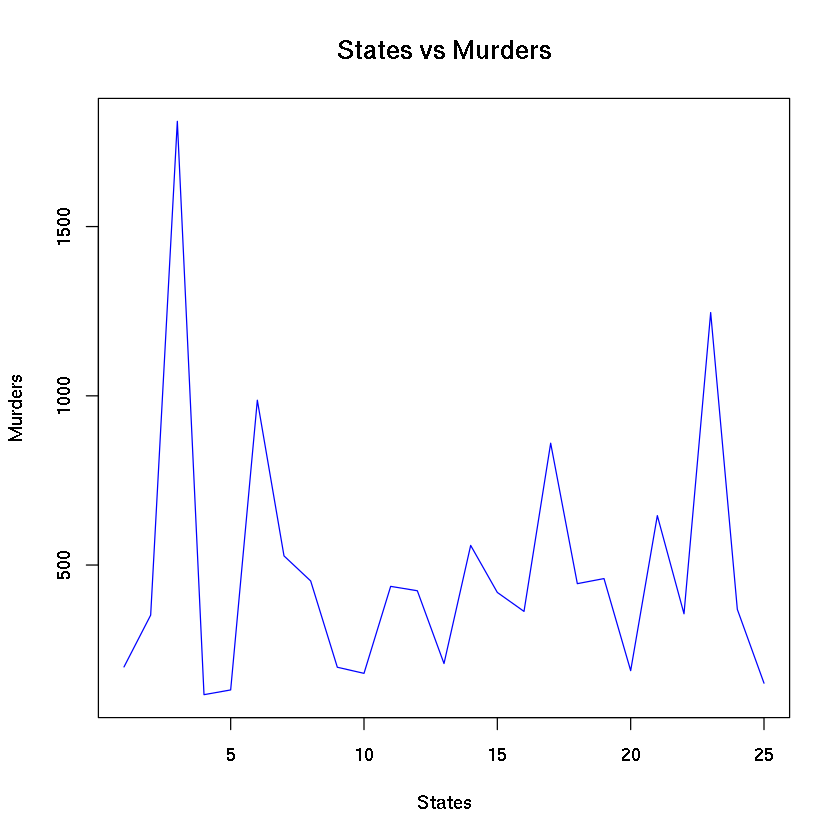

In [44]:
plot(df$murders,type='l', 
    xlab='States', ylab='Murders',
    main='States vs Murders',
    col='blue')

## *Boxplot*

In [46]:
df <- read.csv('../data/murders.csv')
df <- select(df, state, population,murders, region)

Warning message in bxp(list(stats = structure(c(151, 198, 436, 460, 558, 131, 209, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”

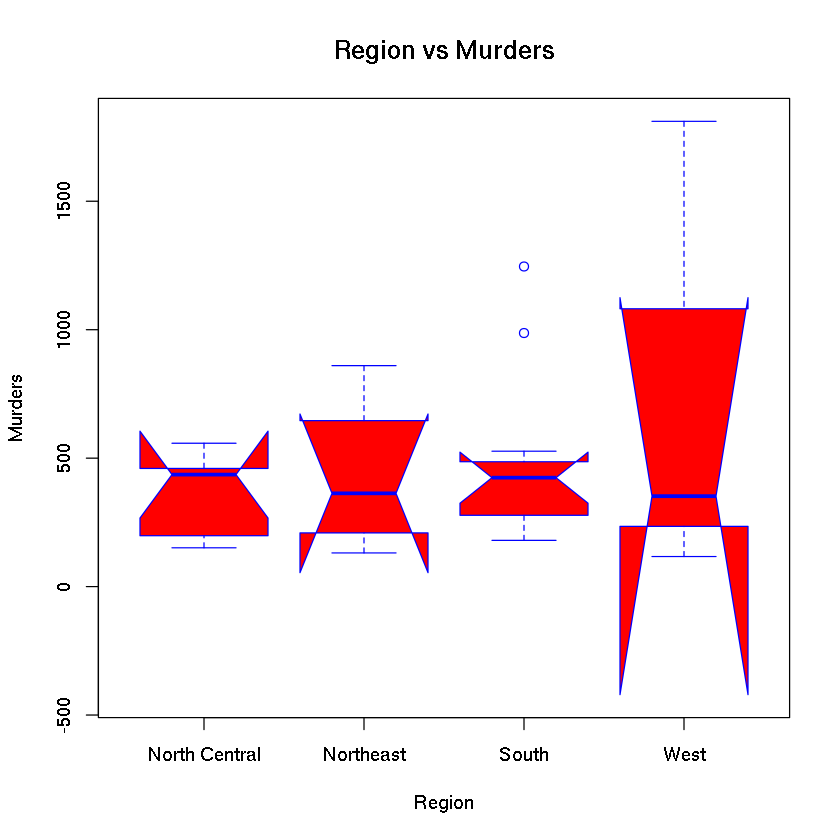

In [50]:
boxplot(df$murders ~ df$region,
       xlab='Region', ylab='Murders',
       main='Region vs Murders',
       col='red', border='blue',
       notch=T) # dipisahkan berdasarkan region

## Kombinasi plot

In [52]:
df <- read.csv("../data/murdersmini.csv")
df <- mutate(df, pop = population/10000)
df <- df[c(1,3,4)] # seleksi kolom 1, 3, dan 4

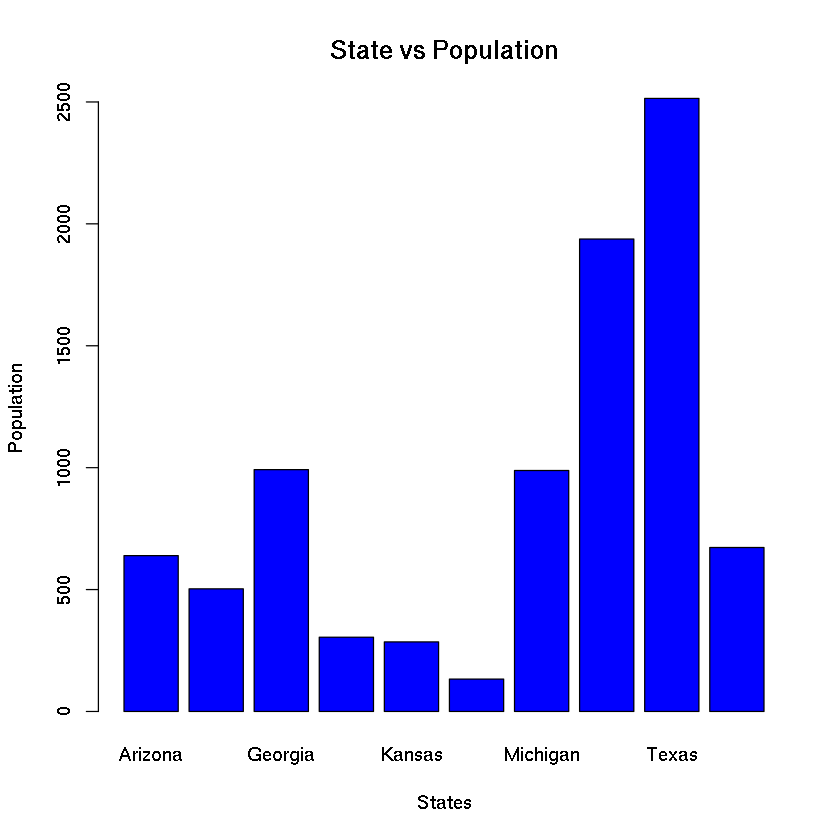

In [53]:
barplot(df$pop, xlab='States', ylab='Population', 
        main='State vs Population', col='blue', names.arg=df$state)

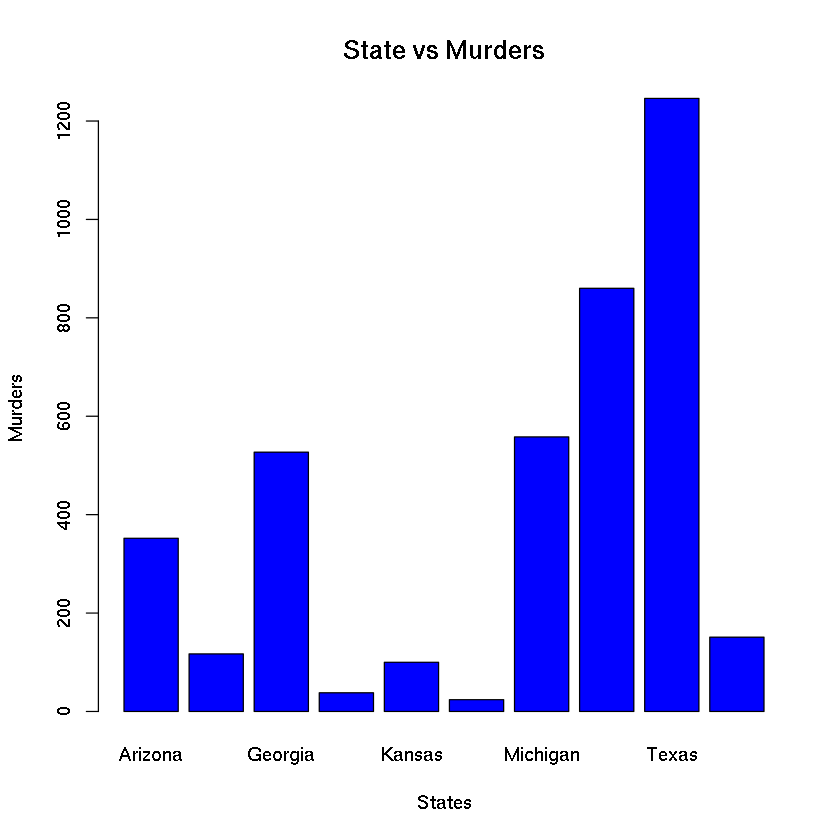

In [54]:
barplot(df$murders, xlab='States', ylab='Murders',
        main='State vs Murders', col='blue', 
       names.arg=df$state)

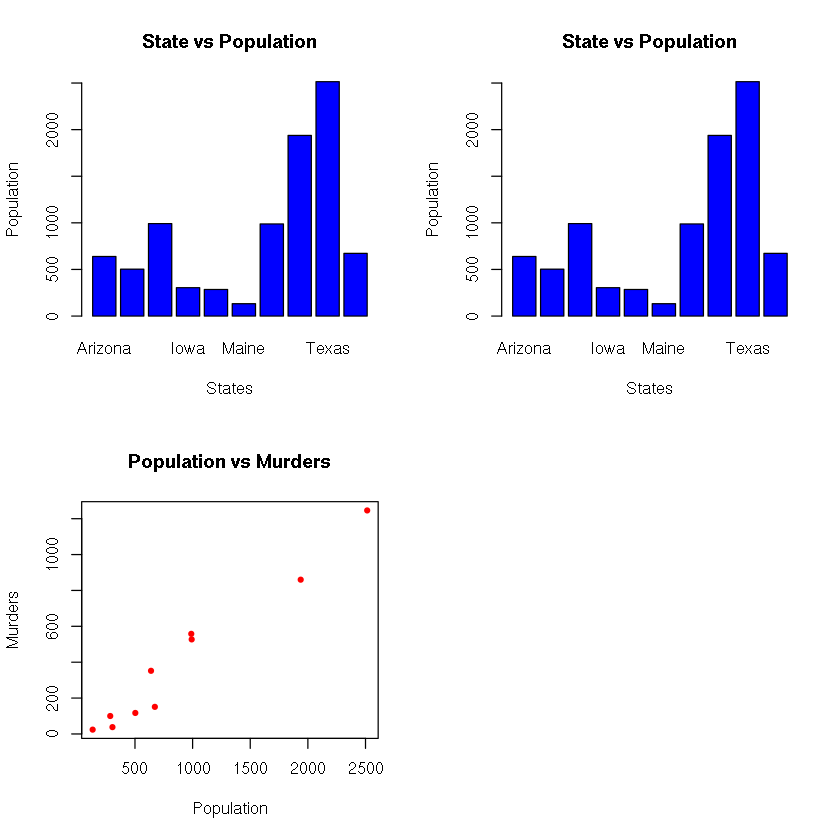

In [60]:
# Supaya tidak jadi dua plot:
par(mfrow=c(2,2)) # 2 baris, 2 kolom
barplot(df$pop, xlab='States', ylab='Population', 
        main='State vs Population', col='blue', names.arg=df$state)
barplot(df$pop, xlab='States', ylab='Population', 
        main='State vs Population', col='blue', names.arg=df$state)
plot(df$pop, df$murders, xlab='Population', ylab='Murders', 
     col='red',pch=20, main='Population vs Murders')